This notebook was created for Christopher Carroll's discussion of "Overpersistence Bias in Individual Income Expectations and its Aggregate Implications" by "Filip Rozsypal and Kathrin Schlafmann" on "July 9, 2018" at "The NBER Behavioral Macroeconomics Conference."  Thanks to Matthew White and Tiphane Magne of the University of Delaware for assistance in preparing this presentation.

<font size="6"><b><center> Beliefs About Income Dynamics</center></b></font>
## Central Element in _All_ Our Models


| Variable Names |  | Definition | 
| --- :| --- | :--- |
| $p$ | - | permanent (noncapital) income | 
| $\Gamma=(1+\gamma)$ | - | _believed_ growth factor: $p_{t+1}=\Gamma p_{t}$ |
| $m$ | - | market wealth |
| $h$ | - | human wealth |

[Benchmark perfect foresight model](http://econ.jhu.edu/people/ccarroll/public/lecturenotes/consumption/PerfForesightCRRA): (CRRA utility, time preference, etc) yield $\kappa$ such that:

$$\begin{eqnarray}
c & = & (m + h) \kappa
\end{eqnarray}
$$

In infinite horizon case, human wealth is:

$$\begin{eqnarray}
h & = & \frac{p}{1-R/\Gamma}
\end{eqnarray}
$$



<font size="6"><b><center> Quantitatively ...</center></b></font>


In [ ]:
# This cell does the calculations supporting the cell below
# Click the "Run" button immediately above the notebook in order to execute the contents of any cell
# WARNING: Each cell in the notebook relies upon results generated by previous cells
#   The most common problem beginners have is to execute a cell before all its predecessors
#   If you do this, you can restart the kernel (see the "Kernel" menu above) and start over
%matplotlib inline
import matplotlib.pyplot as plt

# The first step is to be able to bring things in from different directories
import sys 
import os

sys.path.insert(0, os.path.abspath('../lib'))

from util import log_progress

import numpy as np
import HARK 
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.4f}".format(number)
from HARK.utilities import plotFuncs

# This cell defines a parameter dictionary. You can expand it if you want to see what that looks like.

from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType
PF_dictionary0 = {
    'CRRA' : 1.01,
    'DiscFac' : 0.99,
    'Rfree' : 1.03,
    'LivPrb' : [1.0],
    'PermGroFac' : [1.02],
    'T_cycle' : 1,
    'cycles' : 0,
    'AgentCount' : 10000
}

# To those curious enough to open this hidden cell, you might notice that we defined
# a few extra parameters in that dictionary: T_cycle, cycles, and AgentCount. Don't
# worry about these for now.

PFexample0 = PerfForesightConsumerType(**PF_dictionary0) 
# the asterisks ** basically says "here come some arguments" to PerfForesightConsumerType
PFexample0.solve() # Solve with those parameters
m = 4 # market wealth includes current income 
p = 1 # normalize permanent income to one
# Extract interest and growth factors used in solution
R = PFexample0.Rfree 
PermGroFac0 = PFexample0.PermGroFac[0]
h0 = 1/(1-PermGroFac0/R)
c0 = np.asscalar(PFexample0.solution[0].cFunc(m)) # Evaluate cFunc at m
y0 = 1+(m-1)*(R-1) # Total income = noncapital plus capital income
s0 = (y0 - c0)/y0 
# print y0,h0,c0,s0

PF_dictionary1 = deepcopy(PF_dictionary0)
PermGroFac1 = 1.025
PF_dictionary1['PermGroFac'] = [PermGroFac1]

# Construct and solve consumer with new growth rate
PFexample1 = PerfForesightConsumerType(**PF_dictionary1) 
PFexample1.solve()
h1 = 1/(1-PermGroFac1/R)
c1 = np.asscalar(PFexample1.solution[0].cFunc(m))
y1 = 1+(m-1)*(R-1)
s1 = (y1 - c1)/y1
# print h1,y1,c1,s1

PF_dictionary2 = deepcopy(PF_dictionary0)
PermGroFac2 = 0.0001
PF_dictionary1['PermGroFac'] = [PermGroFac2]
PFexample2 = PerfForesightConsumerType(**PF_dictionary2) 
PFexample2.solve()
h2 = p/(1-PermGroFac2/R)
c2 = np.asscalar(PFexample2.solution[0].cFunc(m))
y2 = 1+(m-1)*(R-1)
s2 = (y2 - c2)/y2
#print y2,h2,c2,s2


Consider:
* Person (or SOE) with assets-to-income ratio $3$
* Calibrate $\Gamma = 1.03$, $R = 1.02$
   * Pick other parameters so saving rate $s = 0.01$

What difference do _beliefs_ about $\Gamma$ make?

|  <br> _believed_ $\Gamma~~~$  | Income <br> $y$ |Consumption <br> $c$ = $(m+h)\kappa$ | Saving <br> $s$ = $ (y - c)/y $ |
| :---: | :---: | --- | ---: |
| $\Gamma=1.020$ | 1.09 | 1.08 | 0.01 |
| $\Gamma=1.025$ | 1.09 | 2.13 | -0.95 |
| $\Gamma=0.000$ | 1.09 | 0.04 | 0.96 |

Uncertainty, liquidity constraints, finite horizons, hyperbolic discounting, etc etc?
* Reduce magnitudes substantially
* Still: $c$ is _hugely_ sensitive to beliefs about $y$ dynamics

<font size="6"><b><center>Tradition: Calibrate Beliefs To Match Evidence</center></b></font>

### Large Literature On $y$ Dynamics

Relaxes assumption that $p$ is permanent; it could merely have _persistence_ $\rho \leq 1$:

$$\begin{eqnarray}
 \log p_{t+1} & = & \gamma + \rho \log p_{t} + \psi_{t+1}
\end{eqnarray}$$



| Paper | Data Source | Observations | $\rho$ <br> (Annual)| Comment |
| :--- | --- | --- | --- | :--- | :--- | --- |
| **Storesletten, Telmer, Yaron (STY) <br> (2004, JME)** | PSID | 4000 | 0.91 | The Authors' Oracle |
| Abowd and Card <br> (Econometrica, 1989) | PSID | 4000 | 1.00 | Wages (not income) |
| Sabelhaus and Song <br> (JME, 2010) | Social Security | 160,000,000 | 1.00 | Throughout |
| Kaplan <br> (QE, 2012) | PSID | 4000 | 0.97 | Table 4, col 3, Appendix E, p. 515 |
| Hryshko <br> (QE, 2012) | PSID | 4000 | 0.99 or 1.00 | Table 13, $\phi$ |
| Bricker et al <br> (BPEA, 2013 ) | IRS | 120,000,000 | 0.96-0.98 | Table 4, p. 96 |

Learned since STY (thanks to millions of datapoints):
1. "transitory" component is MA(1) annually
   * which is implied by time aggregation, cf Muth (1960)
1. Size of shocks varies by age ([Sabelhaus and Song]()):

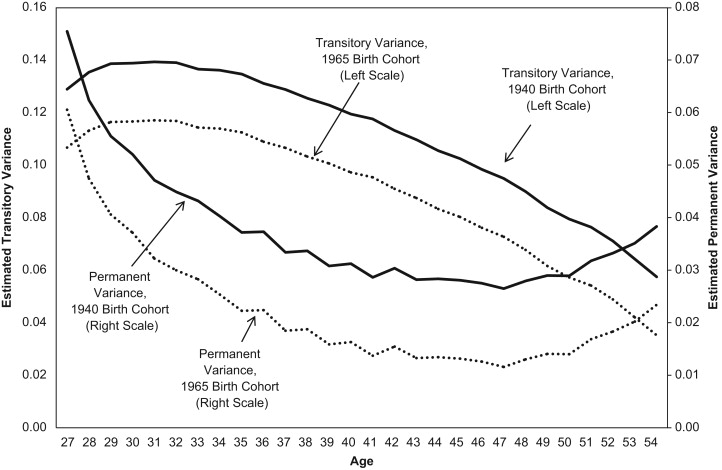

# Beliefs $\Rightarrow$ Saving $\Rightarrow$ Wealth $\Rightarrow$ Macro

Large recent literature:
* Capturing _distribution_ of wealth is first-order 
  * Monetary Policy (HANK literature: Kaplan, Violante, Moll, Mitman, ...)
  * Fiscal Policy (Mian and Sufi, Steinsson and Nakamura, Chodorow-Reich, Ganong and Noel, ...)
  
... because people with low wealth _should_ have high MPC's


<font size="6"><b><center> Beliefs ($\hat{\rho}$) = Truth ($\rho$) Doesn't Work ...</center></b></font>

### If $\hat{\rho} = \rho = 1$

![Lorenz Curves](http://www.econ2.jhu.edu/people/ccarroll/Papers/cstMPCxc/CumWLevSCFCastanedaAndDistSevenPermPlot.png)
(from [cstwMPC](http://www.econ2.jhu.edu/people/ccarroll/papers/cstwMPC/))


* SCF data (Solid locus)
* $\beta$-Point: homogeneous $\beta$
   * Wealth inequality too small: roughly matches $p$ inequality
* $\beta$-Dist:
   * Heterogeneous time preference rates $\beta \in [0.94, 0.98]$
   * $\Rightarrow$ wealth inequality >> $p$ inequality

<font size="6"><b><center> ... Unless "Truth" (for everyone) is $\rho=0.91$ ?</center></b></font>

Inequality in wealth greater than $p$ because:

* $p$-"rich" save _a lot_ because they are _very_ pessimistic
   * $\Rightarrow$ they are _even more_ wealth-"rich" than $p$-rich
* $p$-"poor" don't save because _very_ optimistic
   * $\Rightarrow$ they are _even more_ wealth-"poor" than $p$-poor

I never bought this story:
   * High-$p$ people more *optimistic*
      * About practically everything
      * Inflation, Unemployment, ...

<!--- <font size="6"><b><center> ... But Even with $\hat{\rho}=\rho=0.92$ </center></b></font> --->

<font size="6"><b><center> Authors: Data on Income Growth Expectations Exist</center></b></font>

$\tiny{.}$

<font size="6"><b><center>Let's Use Them!</center></b></font>


# Result 0: [Rich save more](https://www.econ2.jhu.edu/people/ccarroll/Lectures/RichSaveSlides.pdf) because more pessimistic?  NO!

$\tiny{.}$
<font size="2"><b><center>Expected Growth By Income Decile</center></b></font>

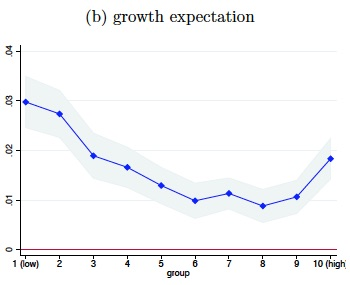

<font size="2"><b><center>Expectation Errors (Figure 2b)</center></b></font>

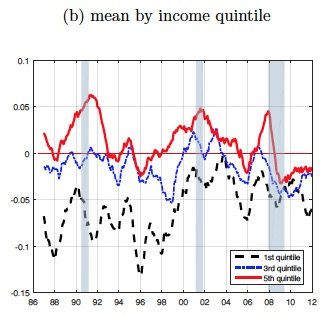

Authors don't really _do_ anything with this result.  They should!

# Authors' Agenda? Part 1
1. What If Everybody is Equally Wrong?
   * Assume true $\rho = 0.91$
   * Find $\hat{\rho}$ that matches "data" best

Data?  _very_ complicated
* "realized" annual growth from nonoverlapping 6-month reinterview?
1. Depends:
   * On assumptions about the "true" $\rho$ process ($\rho=0.91$)
   * People know _without error_ their true last 12 months' income
   * ...
   * ...
   
Sniff test:
1. Authors' calculated "realized" growth numbers seem implausible
   * Half experience growth $> 8$ percent
   * Only 10 percent have income declines
   * How could these numbers average to sample truth (say, 3 percent)
   * Suggestion:
      * By income decile, compare to realized growth from PSID
2. Survey expectations seem more sensible than authors' calculations of "realized"

## A Puzzle

Conflict with ["Understanding Permanent and Temporary Income Shocks"](http://libertystreeteconomics.newyorkfed.org/2017/11/understanding-permanent-and-temporary-income-shocks.html) by Karahan et al using NY Fed's new [Survey of Consumer Expectations](https://www.newyorkfed.org/microeconomics/sce)

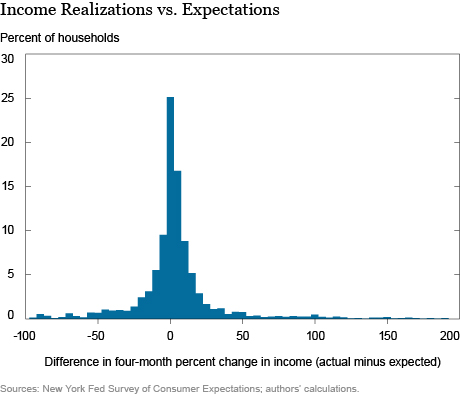

Cryptic footnote 36 says impossible to make this histogram using SCE data ...
<!--- Be careful what you wish for --->

# Authors' Agenda, Part 2

1. Start with model that assumes:

|   | $\rho$ |
| --- | --- |
| Believed | 0.93 ($\approx 0.9831^4$) |
| Truth    | 0.91 ($\approx 0.9774^4$) |

2. Ask it to match dist'n of liquid assets, durables
   * "Models like [ours] are not able to match [wealth distribution] without adding heterogeneity"
   * Why not add heterogeneity, match wealth distribution, and see if results change?
3. Implications if $\hat{\rho}$ changed to (their assumed) $\rho$:
   * Poor people would be less pessimistic, want to borrow more
   * MPC a bit lower
   * Effects of changes in credit would be smaller
   

# Main Critique: What if $\rho \approx 1$?



[Econ-ARK](http://econ-ark.org) can do this (without durables, so far)

Specific Exercise:
0. Starting point: Model that matches wealth distribution by $\beta$-Dist
   * where $\rho=1$ and $\hat{\rho}=\rho$
0. We change beliefs to match authors' claim $\hat{\rho} = 0.93 > \rho = 0.91$
   * Simulate effects on wealth distribution
0. Now switch it: assume $\hat{\rho} = 0.91 < \rho = 0.93$
   * Simulate effects on wealth distribution

In [ ]:
# Initial imports and notebook setup, click arrow to show
%matplotlib inline
import matplotlib.pyplot as plt

import sys
import os
from copy import copy


from HARK.ConsumptionSaving.ConsGenIncProcessModel import *
import HARK.ConsumptionSaving.ConsumerParameters as Params

from HARK.utilities import approxUniform, getLorenzShares, calcSubpopAvg
from time import clock
mystr = lambda number : "{:.4f}".format(number)

In [ ]:
# This cell makes a subclass of PersistentShockConsumerType including the MPC 
class PersistentShockConsumerTypeX(PersistentShockConsumerType):
    def getControls(self):
        cLvlNow = np.zeros(self.AgentCount) + np.nan
        MPCnow = np.zeros(self.AgentCount) + np.nan
        for t in range(self.T_cycle):
            these = t == self.t_cycle
            cLvlNow[these] = self.solution[t].cFunc(self.mLvlNow[these],self.pLvlNow[these])
            MPCnow[these]  =self.solution[t].cFunc.derivativeX(self.mLvlNow[these],self.pLvlNow[these])
        self.cLvlNow = cLvlNow
        self.MPCnow  = MPCnow

In [ ]:
# Define dictionary to make instance of PersistentShockConsumerType for infinite horizon model
BaselineDict = {
        "CRRA": 2.0,                           # Coefficient of relative risk aversion
        "Rfree": 1.01/(1.0 - 1.0/160.0),       # Interest factor on assets
        "DiscFac": 0.97,                       # Default intertemporal discount factor
        "LivPrb" : [1.0 - 1.0/160.0],          # Survival probability
        "AgentCount" : 10000,                  # Number of agents of this type (only matters for simulation)
        "IndL": 10.0/9.0,                      # Labor supply per individual (constant)
        "aNrmInitMean" : np.log(0.00001),      # Mean of log initial assets (only matters for simulation)
        "aNrmInitStd"  : 0.0,                  # Standard deviation of log initial assets (only for simulation)
        "pLvlInitMean" : 0.0,                  # Mean of log initial permanent income (only matters for simulation)
        "pLvlInitStd"  : 0.0,                  # Standard deviation of log initial permanent income (only matters for simulation)
        "PermGroFacAgg" : 1.0,                 # Aggregate permanent income growth factor (only matters for simulation)
        "T_age" : 400,                         # Age after which simulated agents are automatically killed
        "T_cycle" : 1,                         # Number of periods in the cycle for this agent type
        "T_sim":1200,                          # Number of periods to simulate (idiosyncratic shocks model, perpetual youth)
        "aXtraMin" : 0.001,                    # Minimum end-of-period "assets above minimum" value
        "aXtraMax" : 30,                       # Maximum end-of-period "assets above minimum" value               
        "aXtraExtra" : [0.005,0.01],           # Some other value of "assets above minimum" to add to the grid
        "aXtraNestFac" : 3,                    # Exponential nesting factor when constructing "assets above minimum" grid
        "aXtraCount" : 48,                     # Number of points in the grid of "assets above minimum"
        "PermShkCount" : 7,                    # Number of points in discrete approximation to permanent income shocks
        "TranShkCount" : 7,                    # Number of points in discrete approximation to transitory income shocks
        "PermShkStd" : [(0.01*4/11)**0.5],     # Standard deviation of permanent shocks to income
        "TranShkStd" : [(0.01*4)**0.5],        # Standard deviation of transitory shocks to income
        "UnempPrb" : 0.05,                     # Probability of unemployment while working
        "UnempPrbRet" : 0.005,                 # Probability of "unemployment" while retired
        "IncUnemp" : 0.3,                      # Unemployment benefits replacement rate
        "IncUnempRet" : 0.0,                   # "Unemployment" benefits when retired
        "tax_rate" : 0.0,                      # Flat income tax rate
        "T_retire" : 0,                        # Period of retirement (0 --> no retirement)
        "BoroCnstArt" : 0.0,                   # Artificial borrowing constraint; imposed minimum level of end-of period assets
        "CubicBool" : False,                   # Use cubic spline interpolation when True, linear interpolation when False
        "vFuncBool" : True,                    # Whether to calculate the value function during solution    
        "cycles": 0,                           # Make this type have an infinite horizon
        "pLvlPctiles" : np.concatenate(([0.001, 0.005, 0.01, 0.03], np.linspace(0.05, 0.95, num=19),[0.97, 0.99, 0.995, 0.999])),
        "PermGroFac" :[1.000**0.25],           # Permanent income growth factor (no perm growth)                   
        "PrstIncCorr": 0.99,                   # Serial correlation coefficient for persistence of income
    }


In [ ]:
# Attempt to speed solution by shrinking simulation size
# BaselineDict['AgentCount'] = 500
# BaselineDict['CRRA'] = 2.0
# BaselineDict['T_sim'] = 100

In [ ]:
# This cell defines runRoszypalSchlaffmanExperiment: solve and simulate a consumer misperceiving the correlation of persistent income shocks
def runRoszypalSchlaffmanExperiment(CorrAct, CorrPcvd, DiscFac_center, DiscFac_spread):
    '''
    Solve and simulate a consumer type who misperceives the extent of serial correlation
    of persistent shocks to income.
    
    Parameters
    ----------
    CorrAct : float
        Serial correlation coefficient for *actual* persistent income.
    CorrPcvd : float
        List or array of *perceived* persistent income serial correlation
    DiscFac_center : float
        A measure of centrality for the distribution of the beta parameter, DiscFac.
    DiscFac_spread : float
        A measure of spread or diffusion for the distribution of the beta parameter.


    Returns
    -------
    AggWealthRatio: float
        Ratio of Aggregate wealth to income.
    Lorenz: numpy.array
        A list of two 1D array representing the Lorenz curve for assets in the most recent simulated period.
    Gini: float
        Gini coefficient for assets in the most recent simulated period.
    Avg_MPC: numpy.array
        Average marginal propensity to consume by income quintile in the latest simulated period.
    
    '''     
    
    # Make a dictionary to construct our consumer type
    ThisDict = copy(BaselineDict)
    ThisDict['PrstIncCorr'] = CorrAct
    
    # Make a 7 point approximation to a uniform distribution of DiscFac
    DiscFac_list = approxUniform(N=1,bot=DiscFac_center-DiscFac_spread,top=DiscFac_center+DiscFac_spread)[1]
    
    type_list = []
    # Make a PersistentShockConsumerTypeX for each value of beta saved in DiscFac_list
    for i in range(len(DiscFac_list)):    
        ThisDict['DiscFac'] = DiscFac_list[i]    
        ThisType = PersistentShockConsumerTypeX(**ThisDict)
              
        # Make the consumer type *believe* he will face a different level of persistence
        ThisType.PrstIncCorr = CorrPcvd
        ThisType.updatepLvlNextFunc() # Now he *thinks* E[p_{t+1}] as a function of p_t is different than it is
    
        # Solve the consumer's problem with *perceived* persistence 
        ThisType.solve()
    
        # Make the consumer type experience the true level of persistence during simulation
        ThisType.PrstIncCorr = CorrAct
        ThisType.updatepLvlNextFunc()
    
        # Simulate the agents for many periods
        ThisType.T_sim = 100
        #ThisType.track_vars = ['cLvlNow','aLvlNow','pLvlNow','MPCnow']
        ThisType.initializeSim()
        ThisType.simulate()
        type_list.append(ThisType)
    
    # Get the most recent simulated values of X = cLvlNow, MPCnow, aLvlNow, pLvlNow for all types   
    cLvl_all = np.concatenate([ThisType.cLvlNow for ThisType in type_list])
    aLvl_all = np.concatenate([ThisType.aLvlNow for ThisType in type_list])
    MPC_all = np.concatenate([ThisType.MPCnow for ThisType in type_list])
    pLvl_all = np.concatenate([ThisType.pLvlNow for ThisType in type_list])
    
    # The ratio of aggregate assets over the income
    AggWealthRatio = np.mean(aLvl_all) / np.mean(pLvl_all)

    # first 1D array: Create points in the range (0,1)
    wealth_percentile = np.linspace(0.001,0.999,201)

    # second 1D array: Compute Lorenz shares for the created points
    Lorenz_init = getLorenzShares(aLvl_all, percentiles=wealth_percentile)

    # Stick 0 and 1 at the boundaries of both arrays to make it inclusive on the range [0,1]
    Lorenz_init = np.concatenate([[0],Lorenz_init,[1]])
    wealth_percentile = np.concatenate([[0],wealth_percentile,[1]])
    
    # Create a list of wealth_percentile 1D array and Lorenz Shares 1D array
    Lorenz  = np.stack((wealth_percentile, Lorenz_init))

    # Compute the Gini coefficient
    Gini = 1.0 - 2.0*np.mean(Lorenz_init[1])
    
    # Compute the average MPC by income quintile in the latest simulated period
    Avg_MPC = calcSubpopAvg(MPC_all, pLvl_all, cutoffs=[(0.0,0.2), (0.2,0.4),  (0.4,0.6), (0.6,0.8), (0.8,1.0)])
    
    return AggWealthRatio, Lorenz, Gini, Avg_MPC


In [ ]:
# Call runRoszypalSchlaffmanExperiment with their values for (CorrAct, CorrPcvd, DiscFac_center, DiscFac_spread)
AggWealthRatio, Lorenz, Gini, Avg_MPC = runRoszypalSchlaffmanExperiment(0.9774, 0.9831,  0.9867, 0.0067)

# Plot the Lorenz curve  
print('The Lorenz curve for assets is')
plt.plot(Lorenz[0],Lorenz[1])
plt.xlabel('Wealth percentile')
plt.ylabel('Cumulative wealth share')
plt.xlim([0.,1.])
plt.ylim([0.,1.])
plt.show()
    
# print('The aggregate wealth to income ratio is ' + str(AggWealthRatio))
# print('The Gini Coefficient for assests is ' + str(Gini))
# print('The average MPC by income quintile is ' + str(Avg_MPC))


In [ ]:
# What if config is the opposite: $\hat{\rho} = 0.91 < \rho = 0.93$?

AggWealthRatio, Lorenz, Gini, Avg_MPC = runRoszypalSchlaffmanExperiment(0.985, 0.975,  0.9867, 0.0067)

# Plot the Lorenz curve  
print('The Lorenz curve for assets is')
plt.plot(Lorenz[0],Lorenz[1])
plt.xlabel('Wealth percentile')
plt.ylabel('Cumulative wealth share')
plt.xlim([0.,1.])
plt.ylim([0.,1.])
plt.show()
    
# print('The aggregate wealth to income ratio is ' + str(AggWealthRatio))
# print('The Gini Coefficient for assests is ' + str(Gini))
# print('The average MPC by income quintile is ' + str(Avg_MPC))


# Bottom Line
   * $\rho < \hat{\rho}$ decreases wealth inequality
      * Because you $p$-immiserize the high-savers
   * I believe $\rho \approx 1$
   * If their $\hat{\rho} = 0.93$ is right:
      * Will need HUGE heterogeneity in $\beta$
      * _Highly_ correlated with $p$




# Conclusion

## Areas of Agreement

1. Need Better Data!
   * Panel data
   * Period of growth forecast exact match to observed data
   * 'You said $\mathbb{E}[\Delta \log y_{t+1}] < 0$.  Why?'

2. Once $\exists$ good data:
   * Calibrate Models to Measured, not Made-Up Expectations

## Areas of Improvement

* Results of paper _deeply_ dependent on $\rho=0.91$
* I don't buy it; $\rho = 1$ is closer to truth
   * $\rho=0.91$ and $\rho=1$ are bookends
   * They should do both
